1. Прочитайте базу my_BRENT2019.csv

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


2. Добавьте первые разности и стоимости доллара и евро к рублю(можно добавить их 1-е разности)

Text(0.5, 0, 't')

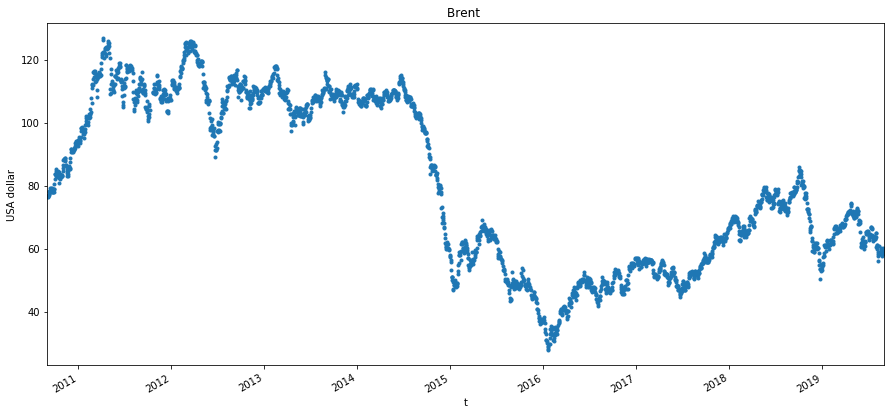

In [3]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [4]:
first_diff =np.array(brent_data.iloc[1:,0].values - brent_data.iloc[:-1,0].values).astype('float32') 
brent_data['diff1'] = 0.0
brent_data['diff1'] =  brent_data['diff1'].astype('float') 
brent_data['diff1'].values[1:] = first_diff 
brent_data.tail()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1
Дата,,,,,,,,,,,,
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0,1.33
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,0.25
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,0.53
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0,-1.18
2019-09-01,58.84,2019,9,1,3,244,35,6,0,1,0,-0.35


In [5]:
rub_doll=pd.read_excel('D_RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [6]:
rub_e = pd.read_excel('E_RC_F01_09_2010_T01_09_2019.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.tail()

,curs
2019-08-27,73.3955
2019-08-28,73.6091
2019-08-29,73.6583
2019-08-30,73.9558
2019-08-31,73.3847


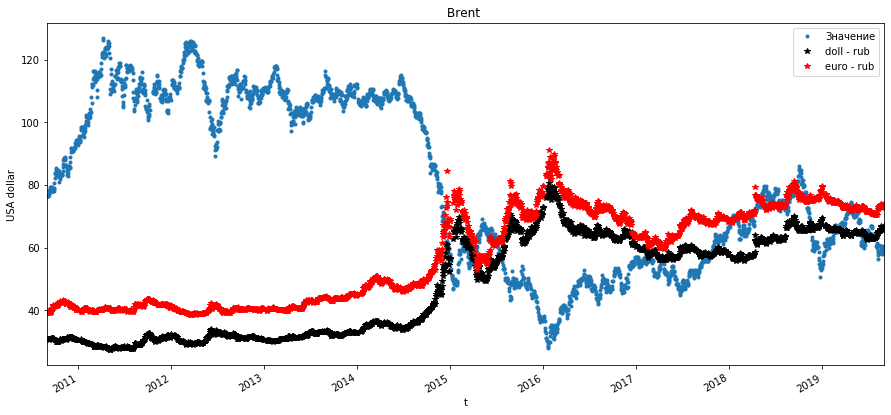

In [7]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.plot(rub_doll.index,rub_doll['curs'].values,'*k', label='doll - rub')
plt.plot(rub_e.index,rub_e['curs'].values,'*r', label='euro - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

In [8]:
brent_data = pd.concat([brent_data, rub_e], axis=1, join='inner')
brent_data.rename(columns={'curs': 'euro'}, inplace=True)
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1,euro
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.00,39.0127
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52,39.1654
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,-0.32,39.2901
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0.05,39.3505
2010-09-07,77.26,2010,9,7,3,250,36,1,0,0,1,0.39,39.4720


In [9]:
brent_data = pd.concat([brent_data, rub_doll], axis=1, join='inner')
brent_data.rename(columns={'curs': 'doll'}, inplace=True)
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1,euro,doll
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.00,39.0127,30.8669
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52,39.1654,30.8001
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,-0.32,39.2901,30.6858
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0.05,39.3505,30.6922
2010-09-07,77.26,2010,9,7,3,250,36,1,0,0,1,0.39,39.4720,30.5771


In [10]:
brent_data.index

Index([2010-09-01, 2010-09-02, 2010-09-03, 2010-09-04, 2010-09-07, 2010-09-08,
       2010-09-09, 2010-09-10, 2010-09-11, 2010-09-14,
       ...
       2019-08-15, 2019-08-16, 2019-08-20, 2019-08-21, 2019-08-22, 2019-08-23,
       2019-08-27, 2019-08-28, 2019-08-29, 2019-08-30],
      dtype='object', length=1758)

In [11]:
brent_data.index = pd.to_datetime(brent_data.index)

3. Сделайте ее перрасчет (ресемплинг) в представление по неделям.

In [12]:
brent_dataw = brent_data.copy().resample('W').mean()
print(np.where(brent_dataw.isna()))
brent_dataw.shape

(array([ 18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,
        18,  58,  58,  58,  58,  58,  58,  58,  58,  58,  58,  58,  58,
        58,  58,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 227, 227, 227, 227, 227, 227, 227, 227, 227,
       227, 227, 227, 227, 227, 279, 279, 279, 279, 279, 279, 279, 279,
       279, 279, 279, 279, 279, 279, 331, 331, 331, 331, 331, 331, 331,
       331, 331, 331, 331, 331, 331, 331, 383, 383, 383, 383, 383, 383,
       383, 383, 383, 383, 383, 383, 383, 383, 435, 435, 435, 435, 435,
       435, 435, 435, 435, 435, 435, 435, 435, 435]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 1

(470, 14)

In [6]:
brent_dataw.iloc[57:60,:]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1
Дата,,,,,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0,0.455000
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.0,21.333333,4.0,294.333333,42.0,4.333333,0.0,0.000000,0.0,1.806667


In [13]:
brent_dataw = brent_dataw[~brent_dataw['Значение'].isin(['NaN'])]
print(np.where(brent_dataw.isna()))
brent_dataw.shape

(array([], dtype=int64), array([], dtype=int64))


(461, 14)

4. Постройте модель предсказания 1-й точки от текущей (h=1).

In [14]:
from sklearn.preprocessing import StandardScaler

scl_target=StandardScaler() 

h=1
target = brent_dataw["Значение"].values[h:].reshape((brent_dataw.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(460, 1)

In [16]:
scl_x=StandardScaler() 

X = brent_dataw.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(460, 14)

In [20]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression

sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(460, 5)

In [21]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(460, 2)

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(460, 1)

In [23]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  1 11 12 13]
Номера признаков лучших признаков по процентной форме:  [ 0 13]
Номера признаков для выбора по модели :  [0]


In [24]:
X_new = X[:,[0, 1, 11, 12, 13]]

In [25]:
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

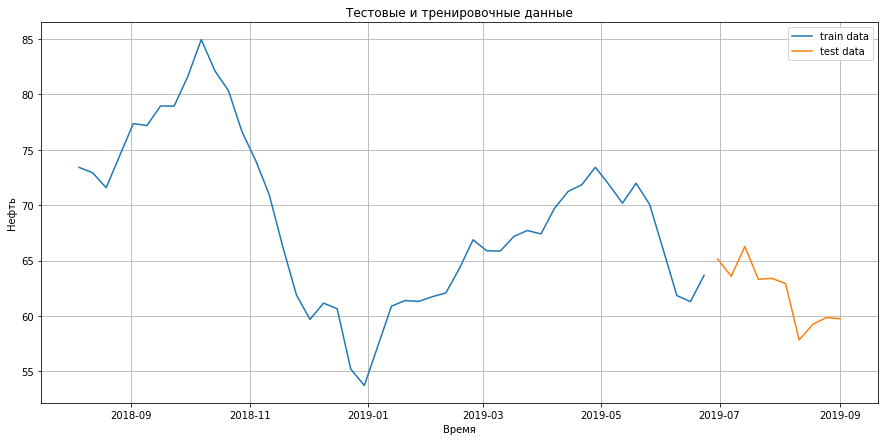

In [27]:
N_x = -56
N_split = -10

train, test = split_data( brent_dataw[N_x:], N_split)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [28]:
X_train =X_new[N_x:N_split,:]
y_train =y[N_x:N_split,0]
X_test =X_new[N_split:,:]
y_test =y[N_split:,0]
train.shape

(46, 14)

In [29]:
from sklearn.linear_model import LinearRegression

model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

In [30]:
model_l.fit( X_train, y_train ) 
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
X_test.shape

(10, 5)

In [32]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

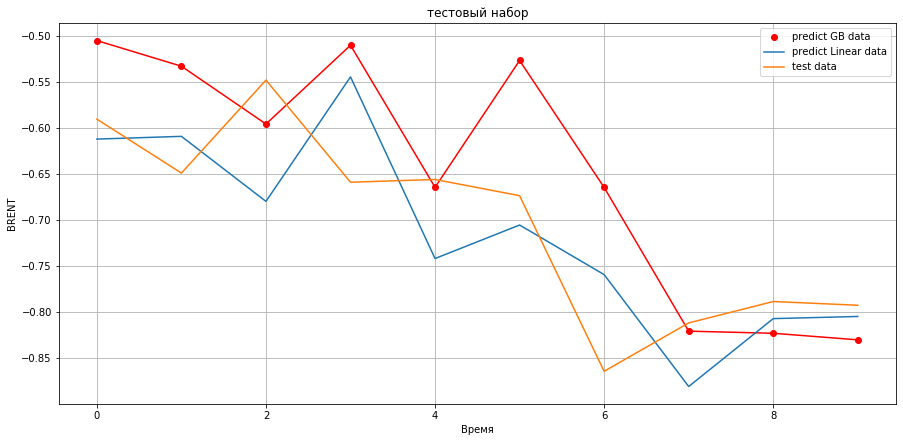

In [36]:
plt.figure( figsize=( 15, 7 ))

plt.title('тестовый набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:10],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:10],'r' )
plt.plot(y_test_pred_l[:10], label='predict Linear data' )
plt.plot(y_test[:10], label='test data')
plt.grid()
plt.legend()
plt.show()

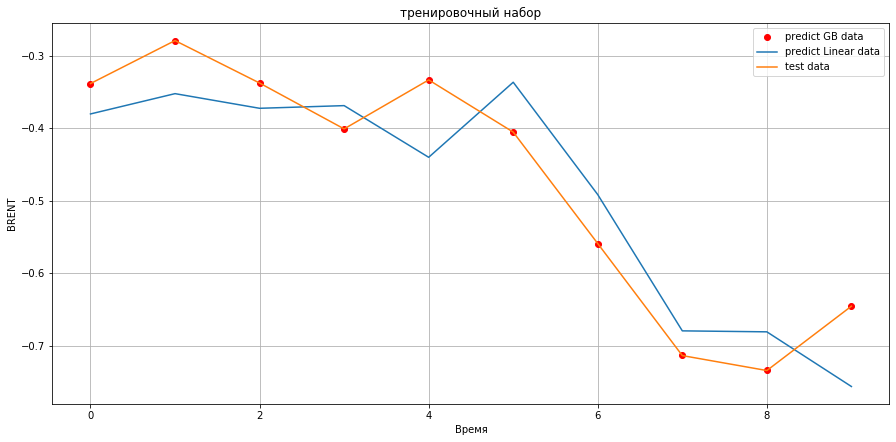

In [37]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g[-10:],'or', label='predict GB data' )
plt.plot(y_pred_l[-10:], label='predict Linear data' )
plt.plot(y_train[-10:], label='test data')
plt.grid()
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [39]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.010972560940916292 
ошибка mae  :   0.08353565901591137 
оценка R2 :   -0.11826095837424955


In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   3.595270438080621 %


In [43]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2, 1, 4, 5], 
              "n_estimators":[50, 100, 200, 300, 400, 500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -0.159 (std: 1.100)
Parameters: {'n_estimators': 400, 'max_depth': 3}

Model with rank: 2
Mean validation score: -0.170 (std: 1.099)
Parameters: {'n_estimators': 200, 'max_depth': 4}

Model with rank: 3
Mean validation score: -0.222 (std: 1.296)
Parameters: {'n_estimators': 400, 'max_depth': 2}



In [44]:
model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=400)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   3.349769396293782 %


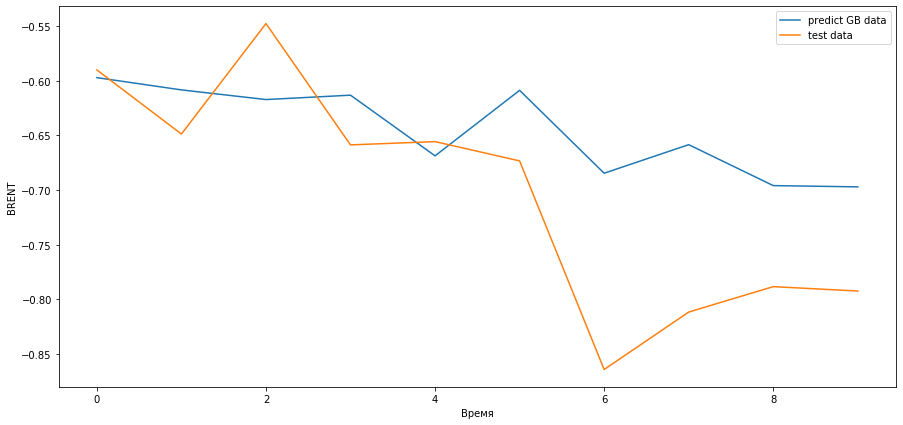

In [45]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

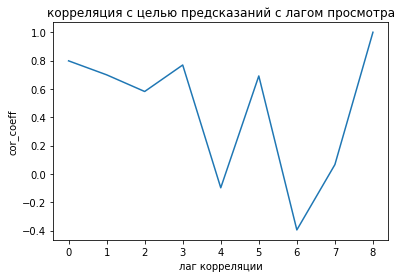

In [46]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

In [47]:
import pickle

filename = 'final_model_brent.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_brent_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_brent_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

5. Добавьте еще один экзогенный фактор - любой:

In [56]:
gold_data = pd.read_csv('comex.GC_100901_190901.csv', index_col=[0], parse_dates=[0])
gold_data.head()

,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
<DATE>,,,,,,
2010-09-01,0,1249.7,1256.6,1244.1,1249.0,91741
2010-09-02,0,1249.0,1255.2,1246.8,1253.1,60175
2010-09-03,0,1253.1,1255.6,1239.2,1251.1,93808
2010-09-05,0,1250.3,1251.3,1248.6,1250.1,1594
2010-09-06,0,1250.1,1253.3,1249.1,1251.1,12464


In [57]:
gold_data['gold'] = (gold_data['<HIGH>'] + gold_data['<LOW>']) / 2
gold_data.drop(['<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>'], axis=1, inplace=True)
gold_data.tail()

,gold
<DATE>,
2019-08-28,1549.95
2019-08-29,1544.20
2019-08-30,1533.75
2019-09-01,1538.05
2019-09-02,1534.25


In [58]:
brent_data = pd.concat([brent_data, gold_data], axis=1, join='inner')
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1,euro,doll,gold
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.00,39.0127,30.8669,1250.35
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52,39.1654,30.8001,1251.00
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,-0.32,39.2901,30.6858,1247.40
2010-09-07,77.26,2010,9,7,3,250,36,1,0,0,1,0.39,39.4720,30.5771,1254.00
2010-09-08,77.93,2010,9,8,3,251,36,2,0,0,0,0.67,39.3215,30.7319,1259.45


In [60]:
brent_data.index = pd.to_datetime(brent_data.index)

In [61]:
brent_dataw = brent_data.copy().resample('W').mean()
print(np.where(brent_dataw.isna()))
brent_dataw.shape

(array([ 18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,
        18,  18,  58,  58,  58,  58,  58,  58,  58,  58,  58,  58,  58,
        58,  58,  58,  58,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  70,  70,  70, 122, 122, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 227, 227, 227, 227, 227,
       227, 227, 227, 227, 227, 227, 227, 227, 227, 227, 279, 279, 279,
       279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 331,
       331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331, 331,
       331, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383,
       383, 383, 383, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435,
       435, 435, 435, 435, 435]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  

(470, 15)

In [62]:
brent_dataw = brent_dataw[~brent_dataw['Значение'].isin(['NaN'])]
print(np.where(brent_dataw.isna()))
brent_dataw.shape

(array([], dtype=int64), array([], dtype=int64))


(461, 15)

In [63]:
scl_target=StandardScaler() 

h=1
target = brent_dataw["Значение"].values[h:].reshape((brent_dataw.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(460, 1)

In [64]:
scl_x=StandardScaler() 

X = brent_dataw.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(460, 15)

In [65]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(460, 5)

In [66]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(460, 2)

In [67]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(460, 1)

In [68]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  1 12 13 14]
Номера признаков лучших признаков по процентной форме:  [ 0 13]
Номера признаков для выбора по модели :  [0]


In [69]:
X_new = X[:,[0, 1, 12, 13, 14]]

In [70]:
N_x = -56
N_split = -10

train, test = split_data( brent_dataw[N_x:], N_split)

In [71]:
X_train =X_new[N_x:N_split,:]
y_train =y[N_x:N_split,0]
X_test =X_new[N_split:,:]
y_test =y[N_split:,0]
train.shape

(46, 15)

In [72]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()
model_l.fit( X_train, y_train ) 
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

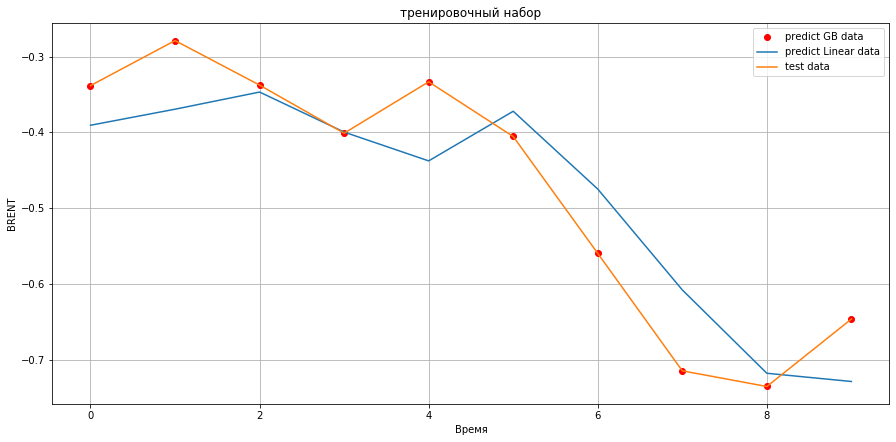

In [75]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g[-10:],'or', label='predict GB data' )
plt.plot(y_pred_l[-10:], label='predict Linear data' )
plt.plot(y_train[-10:], label='test data')
plt.grid()
plt.legend()
plt.show()

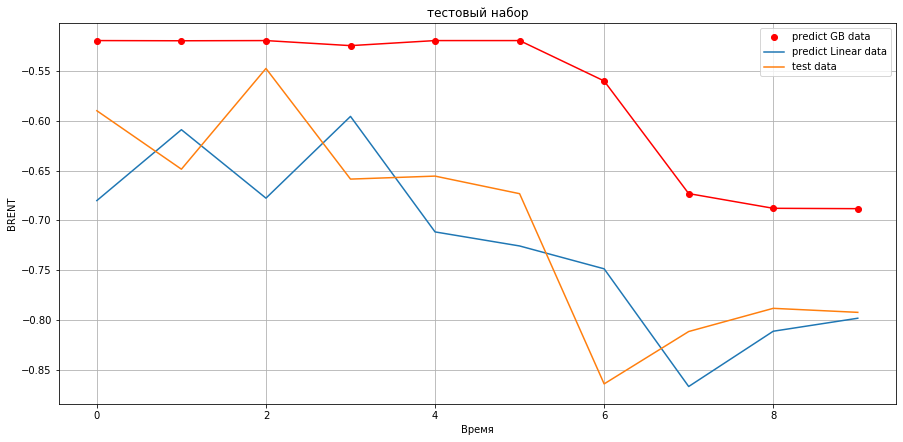

In [74]:
plt.figure( figsize=( 15, 7 ))

plt.title('тестовый набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:10],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:10],'r' )
plt.plot(y_test_pred_l[:10], label='predict Linear data' )
plt.plot(y_test[:10], label='test data')
plt.grid()
plt.legend()
plt.show()

In [76]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.021517711950217084 
ошибка mae  :   0.12986483160280549 
оценка R2 :   -1.192986212966069


In [77]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   5.659753083834414 %


In [82]:
param_dist = {"max_depth": [3, 2, 1, 4, 5], 
              "n_estimators":[10, 30, 50, 100, 200, 300, 400, 500, 1000]}


n_iter_search = 30

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -0.113 (std: 1.383)
Parameters: {'n_estimators': 50, 'max_depth': 2}

Model with rank: 2
Mean validation score: -0.127 (std: 1.343)
Parameters: {'n_estimators': 30, 'max_depth': 2}

Model with rank: 3
Mean validation score: -0.132 (std: 1.427)
Parameters: {'n_estimators': 100, 'max_depth': 2}



In [83]:
model_g_best = GradientBoostingRegressor(max_depth=2,  n_estimators=50)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   3.3737726532643744 %


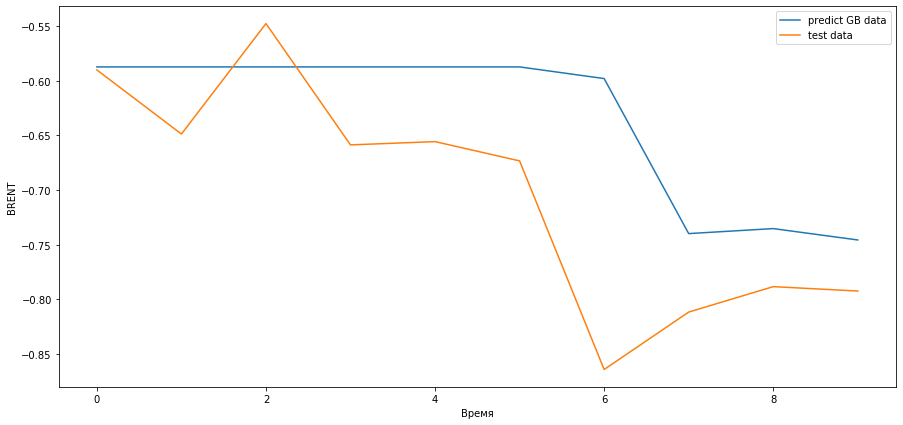

In [84]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

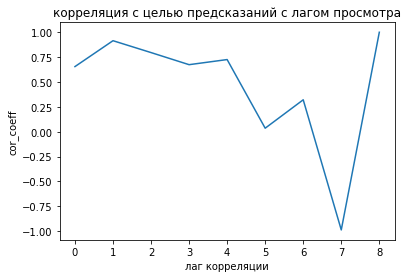

In [85]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

In [86]:
import pickle

filename = 'gold_final_model_brent.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'gold_final_scaler_brent_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'gold_final_scaler_brent_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

6. Сравните модель с дополнительным экзогенным фактором и исходную и сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [ ]:
Модель осталась такой же плохой